In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [4]:
from sklearn.preprocessing import LabelEncoder

def visualize_embeddings_from_dict(embedding_dict, method="tsne", labels=None, perplexity=30, n_neighbors=15, min_dist=0.1):
    # Convert defaultdict to a NumPy array
    keys = sorted(embedding_dict.keys())  # Ensure consistent order
    embeddings = np.array([embedding_dict[key] for key in keys])
    
    if labels is not None and len(labels) != len(embeddings):
        raise ValueError("Number of labels must match the number of embeddings.")
    
    # Encode text labels into numerical values
    if labels is not None:
        le = LabelEncoder()
        numeric_labels = le.fit_transform(labels)  # Convert text to integers
        label_mapping = dict(zip(range(len(le.classes_)), le.classes_))
    else:
        numeric_labels = None
    
    # Choose dimensionality reduction method
    if method == "tsne":
        reducer = TSNE(n_components=2, perplexity=perplexity, random_state=42)

    # Reduce dimensionality
    reduced_embeddings = reducer.fit_transform(embeddings)
    
    # Plot the results
    plt.figure(figsize=(8, 6))
    if labels is not None:
        scatter = plt.scatter(
            reduced_embeddings[:, 0], 
            reduced_embeddings[:, 1], 
            c=numeric_labels, 
            cmap='tab10', 
            s=10, 
            alpha=0.7
        )
        cbar = plt.colorbar(scatter)
        cbar.set_ticks(range(len(label_mapping)))
        cbar.set_ticklabels([label_mapping[i] for i in range(len(label_mapping))])
        cbar.set_label("Labels")
    else:
        plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], s=10, alpha=0.7)
    
    plt.title(f"Embedding Visualization using {method.upper()}")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

In [5]:
import json

with open('../clothing/asin2id.json', 'r') as f:
    asin2id = json.load(f)
id2asin = {value: key for key, value in asin2id.items()}

with open('../clothing/meta_dict.json', 'r') as f:
    meta_dict = json.load(f)

In [6]:
id2cat = {}

for key, val in id2asin.items():
    id2cat[key] = meta_dict[val]['categories'][-1]


In [7]:
import pickle

with open('../clothing/item_embedding_nv_v2.pkl', 'rb') as file:
    item_embedding = pickle.load(file)

In [8]:
labels = [ val for key,val in id2cat.items() ]

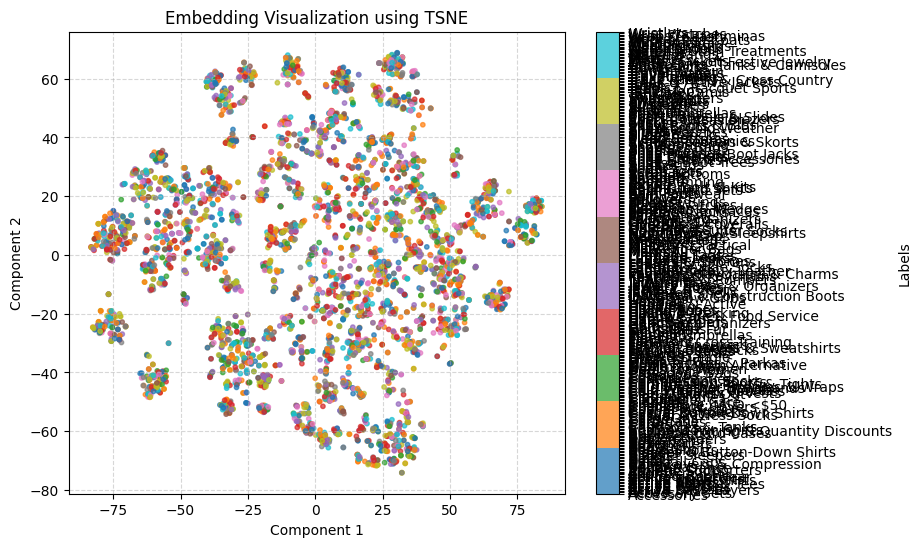

In [9]:
visualize_embeddings_from_dict(item_embedding, method="tsne", labels=labels)

197


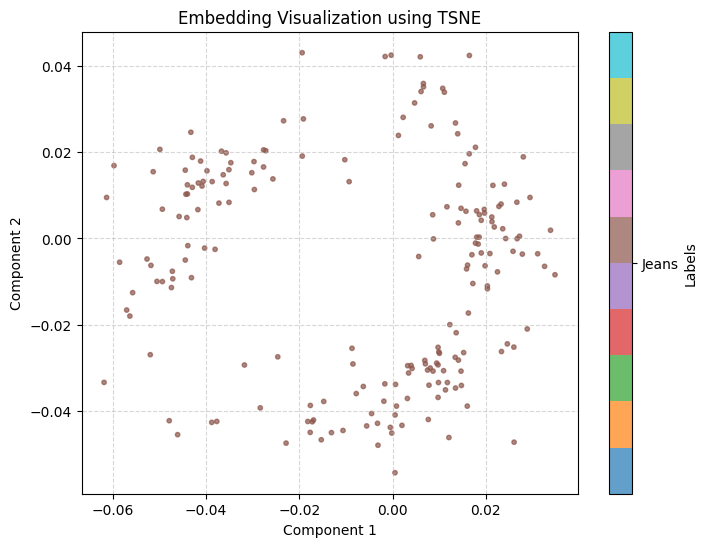

In [10]:
temp_embedding = {}
temp_labels = []

for i in range(len(labels)):
    if labels[i] == 'Jeans':
        temp_embedding[i] = item_embedding[i]
        temp_labels.append(labels[i])

print(len(temp_labels))

visualize_embeddings_from_dict(temp_embedding, method="tsne", labels=temp_labels, perplexity=len(temp_labels)-1)

In [11]:
for i in range(len(labels)):
    if labels[i] == 'Boxer Briefs':
        temp_embedding[i] = item_embedding[i]
        temp_labels.append(labels[i])